# Tugas Fisika Material Komputasi

Arif Tia Diva
22/503229/PA/21616

Diketahui Fungsi respon dari material dalam domain waktu diberikan oleh persamaan berikut:
$$
G(t) = \frac{1}{m} exp \left( \frac{-bt}{2m} \right) sin \left( \frac{\sqrt{4mk-b^2}}{2m}t\right),
$$
untuk $t>0$ (karena prinsip kausalitas).  Sketsa pers. (1) dapat diberikan oleh gambar 1:
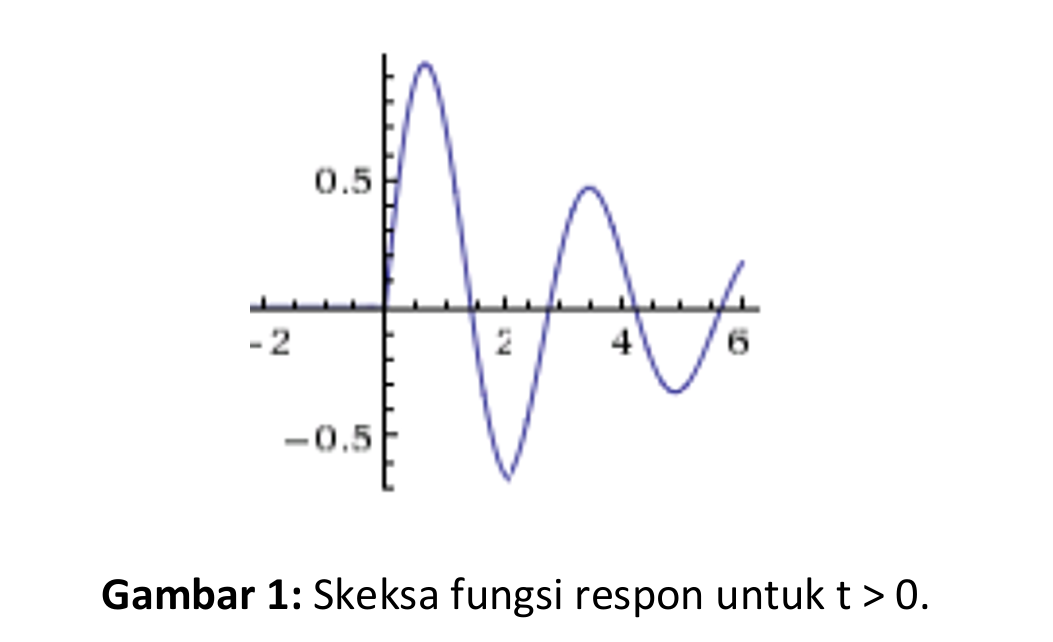 

- Dengan menggunakan pers.(1) plotlah fungsi respon dalam domain waktu ini untuk ∆𝑡=0.1 𝜋 
periode (𝑇=3𝜋), 𝑏=𝑚=1 , dan 𝑘=2. (Tentukanlan terlebih dahulu jumlah data yang 
diperlukan). 

Jumlah data: 30


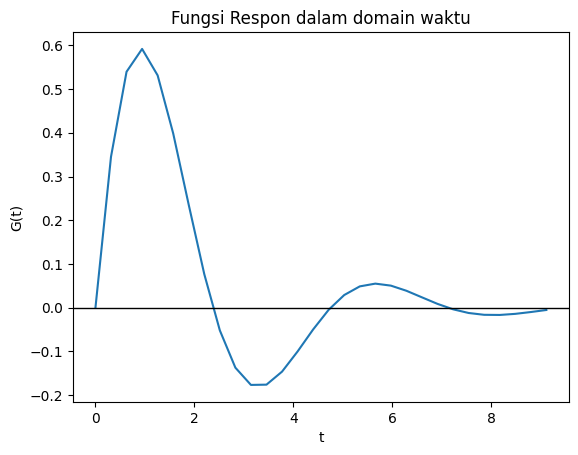

In [38]:
import numpy as np
import matplotlib.pyplot as plt

dt = 0.1 * np.pi
T = 3 * np.pi
b = 1
m = 1
k = 2

t = np.arange(0, T, dt)

#melihat jumlah data
print(f'Jumlah data: {len(t)}')

def fungsi_respon_waktu(t):
    return (1/m) * np.exp(-b*t/(2*m)) * np.sin(np.sqrt(4*m*k-b**2)/(2*m)*t)

G_t = fungsi_respon_waktu(t)

plt.plot(t, G_t)
plt.title('Fungsi Respon dalam domain waktu')
plt.axhline(y=0, color='black', lw=1)
plt.xlabel('t')
plt.ylabel('G(t)')
plt.show()

-  Ubahlah fungsi respon (pers.1) kedalam domain frekuensi dengan menghitung bagian real  dan 
imajiner dari G($\omega$) dengan input pers. (1). Plotlah kurva bagian real dan imajiner G($\omega$) tersebut). 
Bandingkanlah hasil yang diperoleh dengan hasil analitiknya yang diberikan oleh persamaan:
$$
G(\omega) = \frac{1}{m} \frac{\left( \frac{k}{m} - \omega^2 - i \frac{b \omega}{m} \right)}{\left( \frac{k}{m} - \omega^2 \right)^2 + \left( \frac{\omega b}{m} \right)^2}

$$
- (Gunakanlah Teorema Nijquist untuk men-set domain frekuensinya).

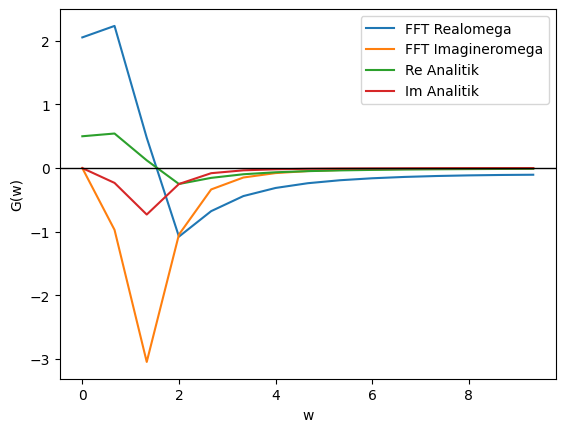

In [41]:
from scipy.fft import fft, fftfreq

def fungsi_respon_frekuensi_analitik_real(omega):
    return (1/m) * ((k/m)-omega**2) / (((k/m)-omega**2)**2+((b*omega)/m)**2)

def fungsi_respon_frekuensi_analitik_imaginer(omega):
    return (1/m) * (((-b*omega)/m)) / (((k/m)-omega**2)**2+((b*omega)/m)**2)

G_w_fft = fft(G_t)
freqs = fftfreq(len(t), dt)
mask = freqs >= 0
G_w_fft = G_w_fft[mask]
omega = 2 * np.pi * freqs[mask]


analitik_real = fungsi_respon_frekuensi_analitik_real(omega)
analitik_imaginer = fungsi_respon_frekuensi_analitik_imaginer(omega)

plt.plot(omega, G_w_fft.real, label='FFT Realomega')
plt.plot(omega, G_w_fft.imag, label='FFT Imagineromega')

plt.plot(omega, analitik_real,label='Re Analitik')
plt.plot(omega,analitik_imaginer, label='Im Analitik')
plt.axhline(y=0, color='black', lw=1)
plt.xlabel('w')
plt.ylabel('G(w)')
plt.legend()
plt.show()

- Verifikasilah bagian imajiner dari G($\omega$) dengan melakukan Transformasi Kramers-Kronig (metode  
Integral) pada bagian real dari G($\omega$) yang diperoleh dari perhitungan sebelumnya.  